In [68]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)


#Plotting
import seaborn as sns


In [18]:
df = pd.read_csv(r"C:\Users\Nicolas\Documents\ironhack_bootcamp\projects\telco_churn_project\data.xls") 
data_dict = pd.read_excel(r"C:\Users\Nicolas\Documents\ironhack_bootcamp\projects\telco_churn_project\data_dict.xlsx") 
# https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

# Telco customer Churn Prediction
    This sample data module tracks a fictional telco company's customer churn based on various factors
    The data set includes information about:

    - Customers who left within the last month: the column is called Churn
    - Services that each customer has signed up for: phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
    - Customer account information: how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
    . Demographic info about customers: gender, age range, and if they have partners and dependents


In [20]:
data_dict

,Feature,Description
0,Customer ID,Contains customer ID
1,gender,Whether the customer is a male or a female
2,SeniorCitizen,"Whether the customer is a senior citizen or not (1, 0)"
3,Partner,"Whether the customer has a partner or not (Yes, No)"
4,Dependents,"Whether the customer has dependents or not (Yes, No)"
5,tenure,Number of months the customer has stayed with the company
6,PhoneService,"Whether the customer has a phone service or not (Yes, No)"
7,MultipleLines,"Whether the customer has multiple lines or not (Yes, No, No phone service)"
8,InternetService,"Customer’s internet service provider (DSL, Fiber optic, No)"
9,OnlineSecurity,"Whether the customer has online security or not (Yes, No, No internet service)"


In [42]:
def summary_statistics(df):
    """
    This function returns summary statistics for a Pandas DataFrame input. Categorical variables will have NaNs for distribution related statistics
    """
    sum_stats_df = (df.describe().round(2)).transpose().reset_index().drop(columns="count")
    describe_df = pd.concat([df.isnull().sum()/(df.shape[0]),df.isnull().sum(),df.dtypes,pd.DataFrame(df.notnull().count(),columns=["count"])],axis=1)
    describe_df = describe_df.set_axis(["null_%","null_count","dtype","count"],axis=1).reset_index()
    return pd.merge(describe_df,sum_stats_df, how="left", on="index").sort_values("dtype").set_index("index").round(2)

In [69]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [43]:
summary_statistics(df)

,null_%,null_count,dtype,count,mean,std,min,25%,50%,75%,max
index,,,,,,,,,,,
SeniorCitizen,0.0,0,int64,7043,0.16,0.37,0.00,0.0,0.00,0.00,1.00
tenure,0.0,0,int64,7043,32.37,24.56,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,0.0,0,float64,7043,64.76,30.09,18.25,35.5,70.35,89.85,118.75
customerID,0.0,0,object,7043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PaymentMethod,0.0,0,object,7043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PaperlessBilling,0.0,0,object,7043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contract,0.0,0,object,7043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StreamingMovies,0.0,0,object,7043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StreamingTV,0.0,0,object,7043,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- 7043 observations 
- No null values across the dataset
- Other than `tenure`, `MonthlyCharges` and TotalCharges, all variables are either boolean or categorical.
- Many categorical variables can be represented as a boolean, given that they have 2 categories only (i.e. Gender)
- TotalCharges datatype will be changed into numeric.

<AxesSubplot: xlabel='TotalCharges', ylabel='Count'>

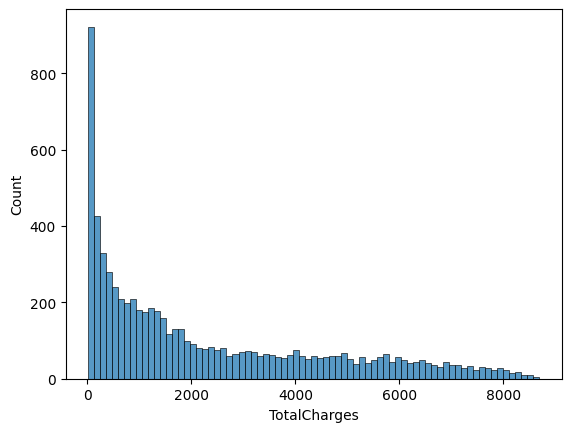

In [65]:
#Histplot shows coherent result of datatype cast for TotalCharges
sns.histplot(pd.to_numeric(df["TotalCharges"], errors="coerce"),bins=75)

In [66]:
#Effectivelly changing the datatype
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [49]:
#Duplicate Rows
print(f"{df.shape[0] - df.drop_duplicates().shape[0]} duplicate rows found")

0 duplicate rows found


- No duplicate rows found